# Hands-On Workshop - Big Data in Healthcare 8400

## Test your knowledge - Dementia Dataset

Your training dataset also comes from [kaggle](https://www.kaggle.com/), a platform for data science competitions. The dataset is called [Dementia Prediction](https://www.kaggle.com/datasets/fatemehmehrparvar/dementia). The dataset is used to generate predictions of dementia using the simple MRI score and the amended MRI score. 

## Instructions

Load and examine the Dementia dataset (`Dementia.csv`). Based on what we just learned, answer the following questions:

1. **Data Understanding and Cleaning**
    - How many records and features are there in the dataset? Identify the number of numerical and categorical features.
    - Are there any missing values in the dataset? If so, in which columns and how many?
    - For numerical columns with missing values, calculate the mean and median. Decide which measure of central tendency is more appropriate for filling the missing values.
  
2. **Statistical Analysis and Visualization**
    - What is the age distribution of the individuals in the dataset? Plot a histogram of the age feature.
    - How does the number of years of education relate to the dementia_all feature? Plot a boxplot showing the distribution of education years for individuals with and without dementia.
    - Explore the relationship between gender and dementia. Calculate the percentage of individuals with dementia for each gender and create a bar plot.
    -**Bonus:** Investigate the prevalence of diabetes, smoking, hypertension, and hypercholesterolemia in the dataset. Create a bar plot for each condition.
  
3. **Advanced Analysis and Insights**
    - Analyze the relationship between the 'SVD Simple Score' and the 'SVD Amended Score'. Is there a strong correlation between these two scores? Use a scatter plot to visualize the relationship.
    - Compare the distribution of the 'PS' (Processing Speed) scores for different categories of the 'hypercholesterolemia' feature. Use a boxplot to visualize the comparison.
    -**Bonus:** Create a confusion matrix

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('Dementia.csv')
data.head()

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,...,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52.67,male,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,...,Yes,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1
1,10,64.58,male,0.0,0,10.0,1.280000,0.360000,0.744000,0,...,Yes,more-than-zero,0 to 1,scans,scans,2.0,3.0,1,1 to 2,>=1
2,100,74.92,male,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,...,Yes,more-than-zero,0 to 1,scans,scans,1.0,2.0,1,1 to 2,0
3,101,74.83,male,1.0,1,9.0,NaN,-2.136271,-1.301102,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,4.0,2,3 to 5,0
4,102,79.25,male,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0


In [9]:
df = pd.read_csv('Dementia.csv')
df_dementia1 = df[df['dementia_all'] == 1]
df_dementia0 = df[df['dementia_all'] == 0]
print(f'shape of df: {df.shape}')
print(f'shape of df_dementia1: {df_dementia1.shape}')
print(f'shape of df_dementia0: {df_dementia0.shape}')

shape of df: (1842, 22)
shape of df_dementia1: (116, 22)
shape of df_dementia0: (1726, 22)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1842 non-null   int64  
 1   age                   1842 non-null   float64
 2   gender                1842 non-null   object 
 3   dementia              1808 non-null   float64
 4   dementia_all          1842 non-null   int64  
 5   educationyears        1842 non-null   float64
 6   EF                    1634 non-null   float64
 7   PS                    1574 non-null   float64
 8   Global                1534 non-null   float64
 9   diabetes              1842 non-null   int64  
 10  smoking               1831 non-null   object 
 11  hypertension          1842 non-null   object 
 12  hypercholesterolemia  1842 non-null   object 
 13  lacunes_num           1842 non-null   object 
 14  fazekas_cat           1842 non-null   object 
 15  study                

In [3]:
# 1. Data Understanding and Cleaning
# a. Records and features, numerical and categorical feature count
num_records, num_features = data.shape
num_numerical = data.select_dtypes(include=['int64', 'float64']).shape[1]
num_categorical = data.select_dtypes(include=['object']).shape[1]
print(f'number of records: {num_records}, number of features: {num_features}')
print(f'number of numerical features: {num_numerical}, number of categorical features: {num_categorical}')

number of records: 1842, number of features: 22
number of numerical features: 12, number of categorical features: 10


In [7]:
# b. Missing values
missing_values = data.isnull().sum()
print(f'missing values:\n{missing_values}')
missing_values_columns = missing_values[missing_values > 0]
print(f'\nnumber of features with missing values: {len(missing_values_columns)}')

missing values:
ID                        0
age                       0
gender                    0
dementia                 34
dementia_all              0
educationyears            0
EF                      208
PS                      268
Global                  308
diabetes                  0
smoking                  11
hypertension              0
hypercholesterolemia      0
lacunes_num               0
fazekas_cat               0
study                     0
study1                    0
SVD Simple Score        677
SVD Amended Score       677
Fazekas                   0
lac_count                 0
CMB_count                 0
dtype: int64

number of features with missing values: 7


In [12]:
# d. Mean and median for numerical columns with missing values
mean_missing_numerical = data[missing_values_columns.index][['dementia', 'EF', 'PS', 'Global', 'SVD Simple Score', 'SVD Amended Score']].mean()
print(f'mean for numerical columns with missing values:\n{mean_missing_numerical}')
median_missing_numerical = data[missing_values_columns.index][['dementia', 'EF', 'PS', 'Global', 'SVD Simple Score', 'SVD Amended Score']].median()
print(f'\nmedian for numerical columns with missing values:\n{median_missing_numerical}')

mean for numerical columns with missing values:
dementia             0.045354
EF                  -0.063088
PS                  -0.066649
Global              -0.026860
SVD Simple Score     0.719313
SVD Amended Score    1.491845
dtype: float64

median for numerical columns with missing values:
dementia             0.000000
EF                   0.130000
PS                  -0.020000
Global               0.006667
SVD Simple Score     0.000000
SVD Amended Score    1.000000
dtype: float64


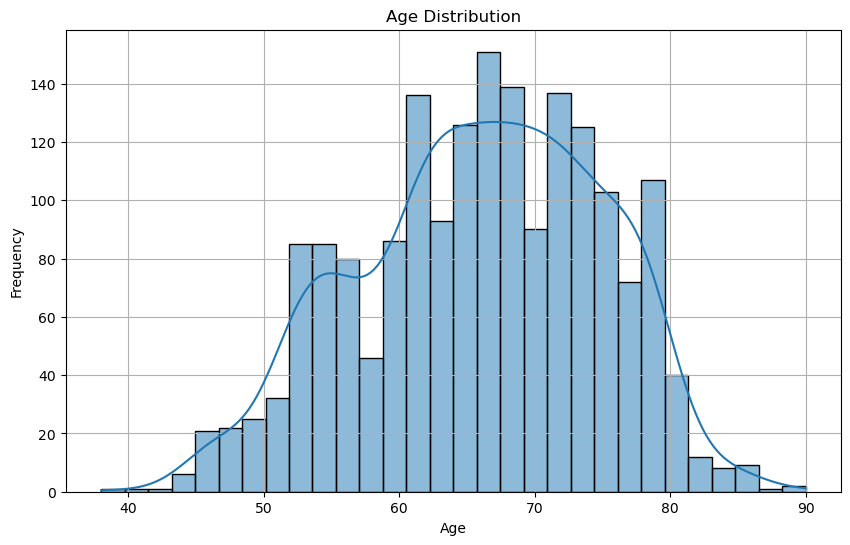

In [13]:
# 2. Statistical Analysis and Visualization
# a. Age distribution (histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

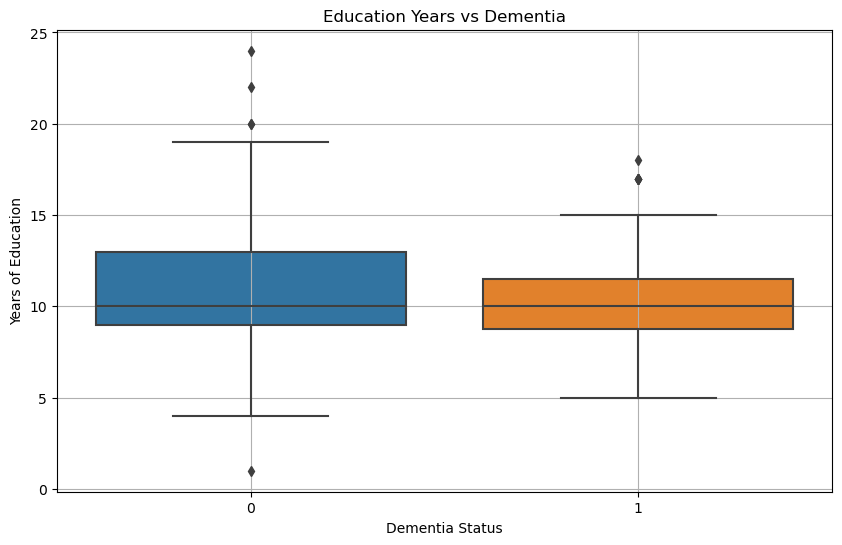

In [15]:
# b. Education years vs dementia_all (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='dementia_all', y='educationyears', data=data)
plt.title('Education Years vs Dementia')
plt.xlabel('Dementia Status')
plt.ylabel('Years of Education')
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


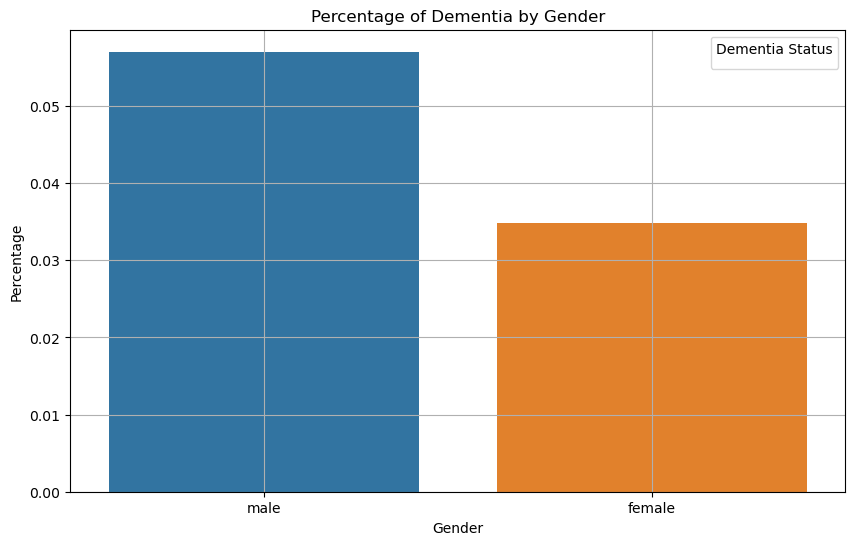

In [19]:
# c. Gender vs dementia (bar plot percentages)
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='dementia', data=data, errorbar=None)
plt.title('Percentage of Dementia by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Dementia Status', loc='upper right')
plt.grid(True)
plt.show()

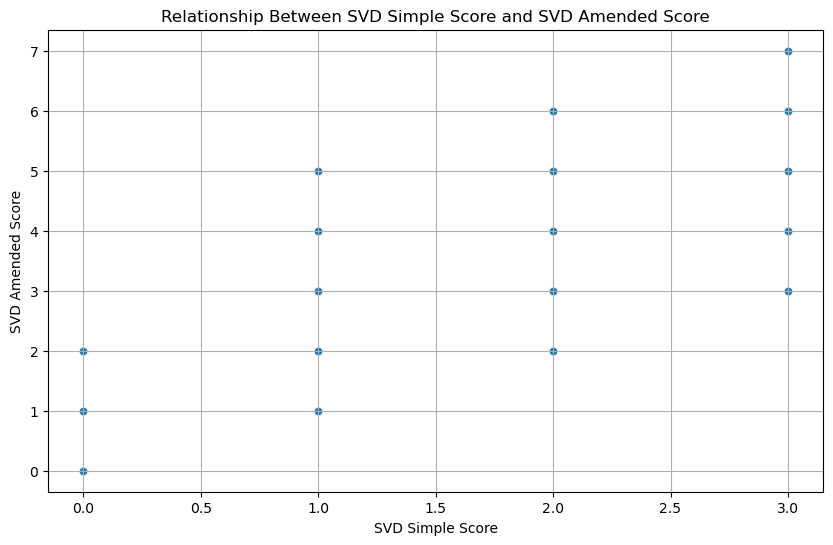

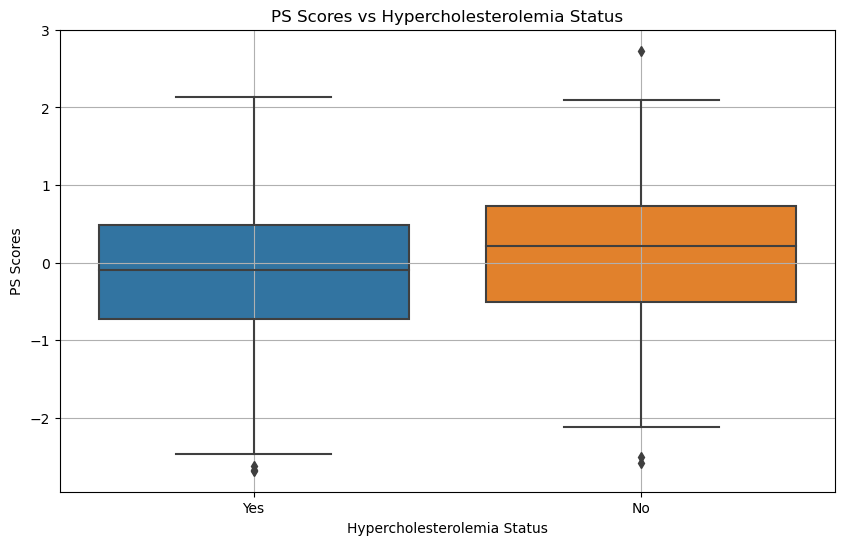

In [22]:
# 3. Advanced Analysis and Insights
# a. Relationship between 'SVD Simple Score' and 'SVD Amended Score' (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SVD Simple Score', y='SVD Amended Score', data=data)
plt.title('Relationship Between SVD Simple Score and SVD Amended Score')
plt.xlabel('SVD Simple Score')
plt.ylabel('SVD Amended Score')
plt.grid(True)
plt.show()

# b. Distribution of 'PS' scores for 'hypercholesterolemia' categories (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='hypercholesterolemia', y='PS', data=data)
plt.title('PS Scores vs Hypercholesterolemia Status')
plt.xlabel('Hypercholesterolemia Status')
plt.ylabel('PS Scores')
plt.grid(True)
plt.show()

#### A static version of this file can be found in my 'github' repository: [https://github.com/hadasvolk/8400ML-WS](https://github.com/hadasvolk/8400ML-WS)